In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# LogisticRegression feature selection

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
wine = load_wine()
print(list(wine.target_names))
print(wine.data)
wine.target[ wine.target ==0 ] = 1 # we use only two classes 
print(wine.target)

['class_0', 'class_1', 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [28]:
X_train, X_test, y_train, y_test = train_test_split( wine.data, wine.target, stratify = wine.target, random_state=42)
print(X_train.shape)

(133, 13)


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 1


In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.992
Test set score: 0.978


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 100


In [30]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.978


# Zad

Wykonaj algorytm LogisticRegression z 

* C = 0.01


In [20]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))

print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.910
Test set score: 0.956


# Zad

Na koniec spójrzmy na współrzędne wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C

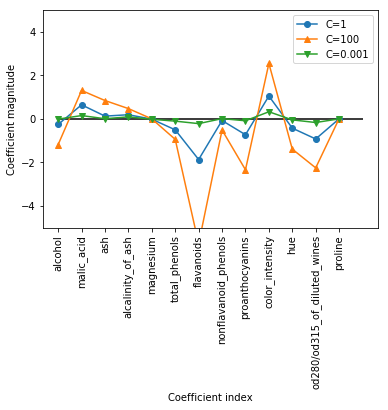

In [21]:
plt.plot(logreg.coef_.T, 'o-', label="C=1")
plt.plot(logreg100.coef_.T, '^-', label="C=100")
plt.plot(logreg001.coef_.T, 'v-', label="C=0.001")
plt.xticks(range(wine.data.shape[1]), wine.feature_names, rotation=90)
plt.hlines(0, 0, wine.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

In [17]:
logreg.coef_

array([[-2.56210916e-01,  6.44780771e-01,  1.24384487e-01,
         1.89040563e-01, -1.55072855e-02, -5.06594018e-01,
        -1.87158204e+00, -7.72514404e-02, -7.31014897e-01,
         1.04811777e+00, -4.28074253e-01, -9.25909502e-01,
         3.42268346e-04]])

In [18]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l2").fit(X_train, y_train)
    print(lr_l1.coef_.T)

[[ 0.0077741 ]
 [ 0.02742974]
 [ 0.00258225]
 [ 0.04030018]
 [-0.00601742]
 [-0.01613855]
 [-0.0350621 ]
 [ 0.00227898]
 [-0.01316346]
 [ 0.07084799]
 [-0.00794853]
 [-0.02719125]
 [-0.00212776]]
[[-2.56210916e-01]
 [ 6.44780771e-01]
 [ 1.24384487e-01]
 [ 1.89040563e-01]
 [-1.55072855e-02]
 [-5.06594018e-01]
 [-1.87158204e+00]
 [-7.72514404e-02]
 [-7.31014897e-01]
 [ 1.04811777e+00]
 [-4.28074253e-01]
 [-9.25909502e-01]
 [ 3.42268346e-04]]
[[-1.18410858e+00]
 [ 1.30476800e+00]
 [ 8.41230578e-01]
 [ 4.70532218e-01]
 [-2.12312302e-03]
 [-9.44770815e-01]
 [-5.74757124e+00]
 [-5.14610522e-01]
 [-2.34265499e+00]
 [ 2.54656223e+00]
 [-1.39344996e+00]
 [-2.25545291e+00]
 [ 7.69615032e-03]]


* Jeśli chcemy mieć bardziej interpretowalny model, może pomóc regulacja L1, ponieważ ogranicza on model do korzystania tylko z kilku współrzędnych. 

* Oto wykres współczynników i dokładności klasyfikacji dla regulacji L1:

# Zad

Narysuj wykre współrzędnych wykorzystywane przez modele z trzema różnymi ustawieniami parametru regularyzacji C i regularyzacją L1.

Training accuracy of l1 logreg with C=0.001: 0.73
Test accuracy of l1 logreg with C=0.001: 0.73
Training accuracy of l1 logreg with C=1.000: 1.00
Test accuracy of l1 logreg with C=1.000: 0.98
Training accuracy of l1 logreg with C=100.000: 1.00
Test accuracy of l1 logreg with C=100.000: 0.98


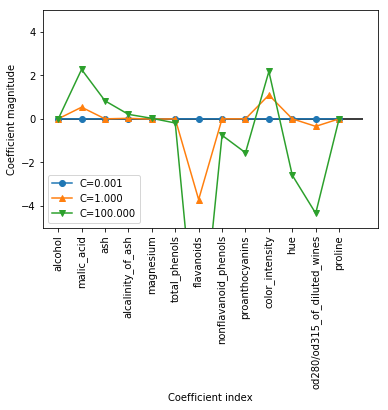

In [25]:
for C, marker in zip([0.001, 1, 100], ['o-', '^-', 'v-']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

    
plt.xticks(range(wine.data.shape[1]), wine.feature_names, rotation=90)
plt.hlines(0, 0, wine.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

In [26]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print(lr_l1.coef_.T)

[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.00140036]]
[[ 0.00000000e+00]
 [ 5.13949208e-01]
 [ 0.00000000e+00]
 [ 3.80463786e-02]
 [-1.56049446e-02]
 [ 0.00000000e+00]
 [-3.67419225e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.07069391e+00]
 [ 0.00000000e+00]
 [-4.19818149e-01]
 [-6.46561146e-04]]
[[-9.52409350e-05]
 [ 2.28775865e+00]
 [ 1.20723547e+00]
 [ 2.05883904e-01]
 [ 1.29494722e-02]
 [-6.81542828e-02]
 [-1.16682191e+01]
 [-2.01552292e-01]
 [-1.75943017e+00]
 [ 2.29238775e+00]
 [-3.80731811e+00]
 [-4.55547398e+00]
 [ 2.69318785e-03]]
